# Visualiszing CBX dynamics

In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
import cbx as cbx
from cbx.dynamics import CBO, CBS
from cbx.objectives import Rastrigin, Ackley
from cbx.utils.objective_handling import cbx_objective_fh
from cbx.scheduler import effective_sample_size, scheduler
from cbx.plotting import PlotDynamic, PlotDynamicHistory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
np.random.seed(420)
conf = {'alpha': 40.0,
        'dt': 0.1,
        'sigma': 1.,#8,#5.1,#8.0,
        'lamda': 1.0,
        'batch_args':{
        'batch_size':200,
        'batch_partial': False},
        'd': 2,
        'max_it': 20,
        'N': 50,
        'M': 3,
        'track_args': {'names':
                       ['update_norm', 
                        'energy','x', 
                        'consensus', 
                        'drift']}
       }

## Using the plotting functions

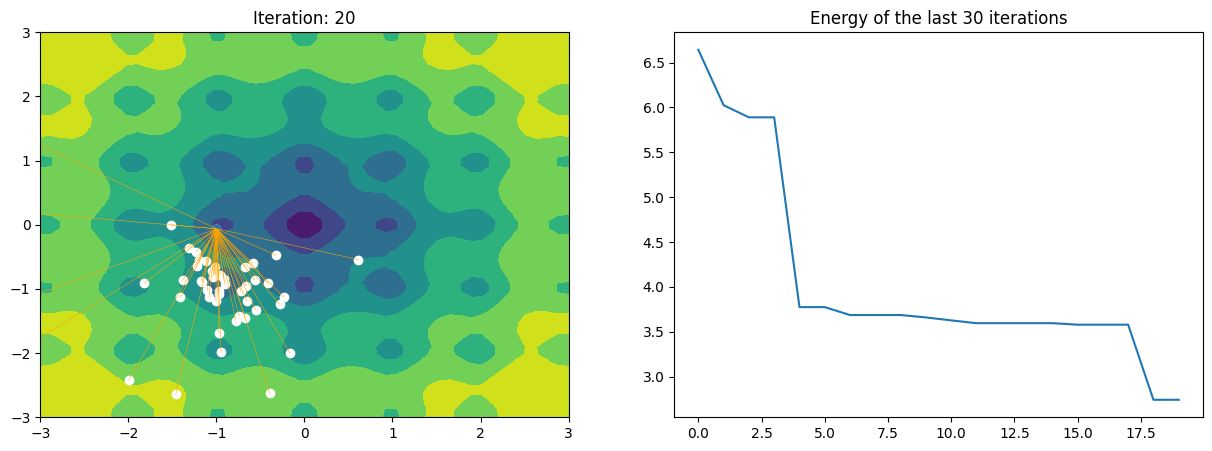

In [7]:
import matplotlib.pyplot as plt
from IPython import display

fig, ax = plt.subplots(1,2, figsize=(15,5))

f = Rastrigin()
x = cbx.utils.init_particles(shape=(conf['M'], conf['N'], conf['d']), x_min=-3., x_max = -1.) # Define the initial positions of the particles


dyn = CBO(f, x=x, noise='isotropic', f_dim='3D', **conf) # Define the CBO algorithm
sched = effective_sample_size(maximum=1e12)
plotter = PlotDynamic(dyn, ax=ax[0],
                       objective_args={'x_min':-3, 'x_max':3},
                       particle_args={'color':'xkcd:white'},
                       plot_consensus=True,
                       plot_drift=True)
plotter.init_plot()
while not dyn.terminate():
    display.clear_output(wait=True)
    dyn.step()
    sched.update(dyn)
    # update energy plot
    ax[1].clear()
    ax[1].plot([e[0] for e in dyn.history['energy'][-30:]])
    ax[1].set_title('Energy of the last 30 iterations') 
    ax[0].set_title('Iteration: ' + str(dyn.it))

    plotter.update(wait=0.2)
    display.display(fig)

In [4]:
# import matplotlib.pyplot as plt
# plt.close('all')
# plotter = PlotDynamicHistory(
#             dyn, dims=[0,1], 
#             objective_args={'x_min':-3, 'x_max':3, 'cmap':'viridis',
#                             'num_pts':300},
#             particle_args = {'s':50, 'c':'xkcd:sky', 'marker':'o'},
#             drift_args = {'color':'pink', 'width':0.003},
#             plot_consensus=True,
#             plot_drift=True)
# plotter.run_plots(wait=0.5, freq=1,)